# **Análise dos Dados de Partidas de Futebol**

## Objetivo 

Os dados de partidas de futebol oferecem um grande potencial para compreender o desempenho dos times e os fatores que influenciam o resultado dos jogos. O objetivo deste projeto é analisar esses dados de forma exploratória, tratando valores ausentes de maneira cuidadosa para preservar suas características originais a fim de desenvolver um modelo preditivo.

## Obtenção dos dados

In [134]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics

plt.style.use('ggplot')

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

In [135]:

# Lendo o arquivo 
df = pd.read_csv('Data/campeonatos_futebol_atualizacao.csv')

## Análise dos Dados

Esta etapa tem por objetivo permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

- **Chutes a gol 1 / 2**: Número de finalizações que foram enquadradas (ao menos foram na direção do gol) pelo time 1 / time 2.
- **Impedimentos 1 / 2**: Quantas vezes cada time foi pego em posição de impedimento.
- **Escanteios 1 / 2**: Total de cobranças de escanteio a favor de cada equipe.
- **Chutes fora 1 / 2**: Finalizações que não foram na direção do gol (para fora) de cada time.
- **Faltas 1 / 2**: Quantas faltas cada time cometeu durante a partida.
- **Cartões amarelos 1 / 2**: Quantos cartões amarelos foram mostrados a jogadores de cada time.
- **Cartões vermelhos 1 / 2**: Quantos cartões vermelhos foram mostrados a jogadores de cada time.
- **Cruzamentos 1 / 2**: Número de passes laterais elevados (cruzamentos) realizados por cada equipe.
- **Laterais 1 / 2**: Quantas vezes cada time executou arremessos laterais.
- **Chutes bloqueados 1 / 2**: Finalizações de cada time que foram bloqueadas por defensores adversários.
- **Contra-ataques 1 / 2**: Quantas ações de contra-ataque (recuperação e transição rápida) cada equipe conduziu.
- **Gols 1 / 2**: Número de gols marcados por cada time.
- **Tiro de meta 1 / 2**: Quantos arremessos de meta (goal kicks) cada time cobrou.
- **Tratamentos 1 / 2**: Quantas vezes jogadores de cada time receberam atendimento médico em campo.
- **Substituições 1 / 2**: Número de trocas de jogadores realizadas por cada equipe.
- **Tiros-livres 1 / 2**: Quantas cobranças de falta (tiros livres) cada time teve.
- **Defesas difíceis 1 / 2**: Número de defesas de alta dificuldade feitas pelos goleiros de cada time.
- **Posse 1 / 2 (%)**: Percentual de tempo de posse de bola de cada equipe ao longo da partida.
- **Time 1 / 2**: Nome do time da casa (1) e do time visitante (2).
- **Position 1 / 2**: Posição tática inicial ou formação de cada equipe (por exemplo: 4-4-2, 3-5-2 etc.).

Vamos dar uma olhada nas primeiras linhas do Dataframe.


In [136]:
#Primeiras 5 linhas 
df.head()

,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiro de meta 1,Tiro de meta 2,Tratamentos 1,Tratamentos 2,Substituições 1,Substituições 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time 2,Position 1,Position 2
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,77.0,23.0,Glasgow Rangers,Livingston,4-3-3,4-3-3
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,44.0,56.0,Ross County,St.Johnstone,3-5-2,3-5-2
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,47.0,53.0,Dundee FC,St. Mirren,4-3-3,3-4-1-2
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,2.0,3.0,NaN,NaN,NaN,NaN,27.0,73.0,Hearts,Celtic,3-4-3,4-2-3-1
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,58.0,42.0,Aberdeen,Dundee U.,4-4-2,3-5-1-1


### Quantas linhas e colunas o conjunto de dados possui? Quais os tipos das variáveis? 

In [137]:
# Tamanho do DataFrame
print(f'Número de linhas: {df.shape[0]}')
print(f'Número de colunas: {df.shape[1]}\n')

# Tipos de dados de cada coluna
print("Tipos de dados por coluna:\n")
print(df.dtypes)

Número de linhas: 27716
Número de colunas: 40

Tipos de dados por coluna:

Chutes a gol 1         float64
Chutes a gol 2         float64
Impedimentos 1         float64
Impedimentos 2         float64
Escanteios 1           float64
Escanteios 2           float64
Chutes fora 1          float64
Chutes fora 2          float64
Faltas 1               float64
Faltas 2               float64
Cartões amarelos 1     float64
Cartões amarelos 2     float64
Cartões vermelhos 1    float64
Cartões vermelhos 2    float64
Cruzamentos 1          float64
Cruzamentos 2          float64
Laterais 1             float64
Laterais 2             float64
Chutes bloqueados 1    float64
Chutes bloqueados 2    float64
Contra-ataques 1       float64
Contra-ataques 2       float64
Gols 1                 float64
Gols 2                 float64
Tiro de meta 1         float64
Tiro de meta 2         float64
Tratamentos 1          float64
Tratamentos 2          float64
Substituições 1        float64
Substituições 2        flo

## Limpeza e transformação dos dados

Precisamos garantir que os dados que estamos analisando sejam precisos, caso contrário, os resultados de nossa análise estarão errados.

Fizemos uma cópia do DataFrame original para preservar os dados intactos durante a análise exploratória e o desenvolvimento do modelo preditivo. Isso nos permite realizar transformações e comparações com os dados originais, garantindo que qualquer alteração possa ser revertida, além de avaliar o impacto das mudanças nas performances do modelo.

In [138]:
df_copy = df.copy()

A simetria da distribuição será inicialmente avaliada com o objetivo de compreender o comportamento dos dados antes de qualquer etapa de limpeza ou transformação. Essa análise preliminar permite identificar possíveis distorções, como a presença de outliers ou distribuições assimétricas, além de fornecer uma base para comparação com os resultados obtidos após o pré-processamento.

A avaliação da simetria será feita por meio da métrica chamada skewness (ou coeficiente de assimetria), que indica o grau de inclinação da curva de distribuição. Quando o valor de skewness é próximo de zero, a distribuição é considerada simétrica. Valores positivos indicam uma cauda longa à direita (assimetria positiva) e valores negativos, uma cauda longa à esquerda (assimetria negativa). Em geral, considera-se que distribuições com skewness entre -0.5 e 0.5 são aproximadamente simétricas.

In [139]:
# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)


                     Assimetria (skewness) Distribuição
Chutes fora 2                    99.858429  Assimétrica
Cartões vermelhos 1               4.632811  Assimétrica
Cartões vermelhos 2               4.430716  Assimétrica
Faltas 2                          2.820571  Assimétrica
Contra-ataques 2                  2.147097  Assimétrica
Contra-ataques 1                  2.023837  Assimétrica
Chutes a gol 2                    1.968407  Assimétrica
Chutes a gol 1                    1.812375  Assimétrica
Tratamentos 1                     1.501920  Assimétrica
Tratamentos 2                     1.372405  Assimétrica
Impedimentos 2                    1.198815  Assimétrica
Impedimentos 1                    1.181808  Assimétrica
Chutes bloqueados 1               1.129360  Assimétrica
Chutes bloqueados 2               1.122076  Assimétrica
Gols 2                            1.104355  Assimétrica
Gols 1                            0.960099  Assimétrica
Cruzamentos 2                     0.906040  Assi

A análise da assimetria (skewness) mostrou que várias variáveis numéricas do conjunto de dados apresentam distribuições assimétricas. Esse comportamento pode comprometer a consistência da análise estatística e a performance de modelos que assumem distribuições mais equilibradas. Por isso, nas próximas etapas, será realizado o tratamento de valores duplicados e outliers com o objetivo de reduzir essas distorções e aproximar as distribuições de uma forma mais simétrica e adequada à análise.

### Tratando linhas duplicadas

Verificando se há registros duplicados no Dataframe, pois não nos interessar analisar a mesma partida mais de uma vez. 

In [140]:

# Verificando se há linhas duplicadas no dataframe
if df.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')


Sim, existem 12 linhas duplicadas.


Identificamos a presença de registros duplicados no dataframe. Na ausência de uma coluna com a data das partidas, adotamos o critério de considerar duplicatas exatas como representações da mesma partida. 

Assim, como cada linha representa uma partida de futebol, essas duplicatas indicam possíveis inconsistências, como erros de entrada ou falhas na coleta de dados.

A remoção dessas entradas garante que cada partida seja considerada apenas uma vez, preservando a integridade do conjunto de dados e evitando distorções nas análises estatísticas.

In [141]:
# Retorna um novo Dataframe com apenas as linhas não duplicadas 
df_copy = df_copy.loc[~df_copy.duplicated()].drop_duplicates().reset_index(drop=True)

# Nesse modelo não é considerado outlier nem imputação. Dessa forma, basta utilizarmo o df sem duplicata
df_randomForest = df_copy.loc[~df_copy.duplicated()].drop_duplicates().reset_index(drop=True)


# Verificando novamente se há linhas duplicadas no dataframe
if df_copy.duplicated().any():
    # Contando o número total de linhas duplicadas
    quantidade_duplicadas = df_copy.duplicated().sum()
    print(f'Sim, existem {quantidade_duplicadas} linhas duplicadas.')
else:
    print('Não, não existem linhas duplicadas.')

Não, não existem linhas duplicadas.


### Qual a porcentagem de valores ausentes no dataset?

Vamos analisar a porcentagem de Not a Number em cada coluna.

In [142]:
# Porcentagem de NaN
def pegaPorcentagemNulaTabelas(tabela):
  return (tabela.isnull().sum()/len(tabela)*100).sort_values(ascending=False)

tabelaPorcentagem = pegaPorcentagemNulaTabelas(df)

print(tabelaPorcentagem)

print(df_copy.dtypes)

Tratamentos 2          81.891326
Tratamentos 1          81.891326
Defesas difíceis 2     77.644682
Defesas difíceis 1     77.644682
Tiros-livres 1         77.464281
Tiros-livres 2         77.464281
Contra-ataques 2       77.402944
Contra-ataques 1       77.402944
Chutes bloqueados 1    68.094242
Chutes bloqueados 2    68.094242
Cruzamentos 1          67.473661
Cruzamentos 2          67.473661
Substituições 1        66.012412
Substituições 2        66.012412
Tiro de meta 1         56.649589
Tiro de meta 2         56.649589
Laterais 1             45.277096
Laterais 2             45.277096
Impedimentos 1         10.008659
Impedimentos 2         10.008659
Posse 1(%)              8.478857
Posse 2(%)              8.478857
Escanteios 1            8.399480
Escanteios 2            8.399480
Chutes fora 2           8.385048
Chutes fora 1           8.385048
Faltas 1                8.377832
Faltas 2                8.377832
Position 2              5.881080
Position 1              5.780055
Chutes a g

Considerando nosso senso comum acerca de futebol, juntamente à muita quantidade atrelada ao alto números de NaN as colunas eliminas serão: Tratamentos 1 e 2, Substituições 1 e 2 e Tiro de meta 1 e 2 e Laterais 1, Laterais 2 

In [143]:
# Lista das colunas a serem eliminadas
colunas_para_deletar = [
    'Tratamentos 1', 'Tratamentos 2',
    'Substituições 1', 'Substituições 2',
    'Tiro de meta 1', 'Tiro de meta 2',
]
# Filtrando para manter apenas as colunas que existem no DataFrame
colunas_existentes = [col for col in colunas_para_deletar if col in df_copy.columns]

# Deletando as colunas que existem
df_copy.drop(columns=colunas_existentes, inplace=True)

print(f'Número de colunas: {df_copy.shape[1]}\n')


Número de colunas: 34



In [144]:
# Lista de colunas que não devem ser alteradas
colunas_excecao = ['Time 1', 'Time 2', 'Position 1', 'Position 2']

# Cria uma nova lista com todas as colunas numéricas do df
# Verifica se as colunas em col são numéricas com pd.api.types.is_numeric_dtypes(df[col])
# Retorna True se a coluna col for numérica e False se não for numérica
colunas_para_imputar = [col for col in df_copy.columns if col not in colunas_excecao and pd.api.types.is_numeric_dtype(df_copy[col])]

# Imputa os NaNs pela mediana de cada coluna

def preecheTabelaComMediana():
    for col in colunas_para_imputar:
        mediana = df_copy[col].median()           # Calcula a mediana da coluna 
        df_copy[col] = df_copy[col].fillna(mediana)    # Susbtitui os valores NaN pela mediana 


def preecheTabelaComMedianaPorcentagem(porcentagem):

  for coluna in df_copy:
    if(tabelaPorcentagem[coluna] < porcentagem and df_copy.dtypes[coluna] == 'float64'):

      col_median=df_copy[coluna].median()

      df_copy[coluna]=df[coluna].fillna(col_median)

  return df_copy

# Preenchemos apenas a posição com moda pelo fato de sua coluna ser tipada como um string
def preencheTabelaComModa():
    modaP1, modaP2 = df_copy['Position 1'].mode()[0],df_copy['Position 2'].mode()[0]
    df_copy['Position 1']=df_copy['Position 1'].fillna(modaP1)
    df_copy['Position 2']=df_copy['Position 2'].fillna(modaP2)
    return df_copy

preecheTabelaComMediana()
preencheTabelaComModa()

# Verifica se ainda existem NaNs

print(df_copy.isna().sum())


Chutes a gol 1         0
Chutes a gol 2         0
Impedimentos 1         0
Impedimentos 2         0
Escanteios 1           0
Escanteios 2           0
Chutes fora 1          0
Chutes fora 2          0
Faltas 1               0
Faltas 2               0
Cartões amarelos 1     0
Cartões amarelos 2     0
Cartões vermelhos 1    0
Cartões vermelhos 2    0
Cruzamentos 1          0
Cruzamentos 2          0
Laterais 1             0
Laterais 2             0
Chutes bloqueados 1    0
Chutes bloqueados 2    0
Contra-ataques 1       0
Contra-ataques 2       0
Gols 1                 0
Gols 2                 0
Tiros-livres 1         0
Tiros-livres 2         0
Defesas difíceis 1     0
Defesas difíceis 2     0
Posse 1(%)             0
Posse 2(%)             0
Time 1                 0
Time 2                 0
Position 1             0
Position 2             0
dtype: int64


In [145]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Chutes fora 2                   104.319225  Assimétrica
Contra-ataques 1                  5.045108  Assimétrica
Contra-ataques 2                  4.988702  Assimétrica
Cartões vermelhos 1               4.633895  Assimétrica
Cartões vermelhos 2               4.429616  Assimétrica
Defesas difíceis 1                3.150355  Assimétrica
Faltas 2                          2.944673  Assimétrica
Chutes bloqueados 1               2.692291  Assimétrica
Defesas difíceis 2                2.310930  Assimétrica
Cruzamentos 2                     2.143652  Assimétrica
Chutes a gol 2                    2.013517  Assimétrica
Chutes a gol 1                    1.897795  Assimétrica
Chutes bloqueados 2               1.828564  Assimétrica
Cruzamentos 1                     1.717329  Assimétrica
Impedimentos 1                    1.269868  Assimétrica
Impedimentos 2                    1.257515  Assimétrica
Gols 2                            1.104387  Assi

### Tratando Outliers

Descrever a importancia de tracar outliers aqui, como foi feito e justificar a escolha do método. 

In [146]:
# Definindo o threshold para o IQR
threshold = 1.5

# Selecionando apenas colunas numéricas
numeric_cols = df_copy.select_dtypes(include='number').columns

# Criando um dicionário para armazenar os resultados
outliers_por_coluna = {}

for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.20)
    Q3 = df_copy[col].quantile(0.80)
    IQR = Q3 - Q1
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    outliers_por_coluna[col] = len(outliers)

# Criando uma tabela
tabela_outliers = pd.DataFrame.from_dict(outliers_por_coluna, orient='index', columns=['Quantidade de Outliers'])
tabela_outliers = tabela_outliers.sort_values(by='Quantidade de Outliers', ascending=False)

print(tabela_outliers)


                     Quantidade de Outliers
Cruzamentos 1                          8532
Cruzamentos 2                          8449
Chutes bloqueados 1                    6851
Chutes bloqueados 2                    6823
Tiros-livres 1                         5680
Tiros-livres 2                         5663
Defesas difíceis 2                     4976
Defesas difíceis 1                     4760
Contra-ataques 2                       4154
Contra-ataques 1                       4123
Laterais 2                             1673
Cartões vermelhos 2                    1545
Cartões vermelhos 1                    1325
Laterais 1                             1117
Impedimentos 1                          552
Impedimentos 2                          429
Chutes fora 1                           249
Gols 1                                  217
Chutes fora 2                           206
Escanteios 2                            175
Cartões amarelos 2                      119
Posse 1(%)                      

In [147]:
# Remover os outliers das colunas numéricas
for col in numeric_cols:
    Q1 = df_copy[col].quantile(0.01)
    Q3 = df_copy[col].quantile(0.99)
    IQR = Q3 - Q1
    
    # Identificando os outliers
    outliers = df_copy[(df_copy[col] < Q1 - threshold * IQR) | (df_copy[col] > Q3 + threshold * IQR)]
    
    # Excluindo os outliers
    df_copy = df_copy.drop(outliers.index)


In [148]:
# ESTUDANDO A SIMETRIA PARA VER QUAL O MELHOR VALOR DE % NO OUTLIER (PAGAR DEPOIS)

# Selecionando apenas colunas numéricas
colunas_numericas = df_copy.select_dtypes(include='number')

# Calculando a assimetria (skewness) ignorando NaNs
skewness = colunas_numericas.skew()

# Criando uma tabela organizada
tabela_simetria = pd.DataFrame({
    'Assimetria (skewness)': skewness,
    'Distribuição': ['Simétrica' if abs(val) < 0.5 else 'Assimétrica' for val in skewness]
}).sort_values(by='Assimetria (skewness)', ascending=False)

# Exibindo a tabela
print(tabela_simetria)

                     Assimetria (skewness) Distribuição
Cartões vermelhos 1               4.594674  Assimétrica
Contra-ataques 2                  4.457384  Assimétrica
Contra-ataques 1                  4.324788  Assimétrica
Cartões vermelhos 2               4.290566  Assimétrica
Defesas difíceis 1                3.149660  Assimétrica
Chutes bloqueados 1               2.687217  Assimétrica
Defesas difíceis 2                2.309934  Assimétrica
Cruzamentos 2                     2.139241  Assimétrica
Chutes bloqueados 2               1.829772  Assimétrica
Cruzamentos 1                     1.715434  Assimétrica
Impedimentos 2                    1.257928  Assimétrica
Impedimentos 1                    1.211029  Assimétrica
Gols 2                            1.103478  Assimétrica
Tiros-livres 2                    1.082129  Assimétrica
Tiros-livres 1                    0.967468  Assimétrica
Gols 1                            0.960561  Assimétrica
Chutes fora 2                     0.876559  Assi

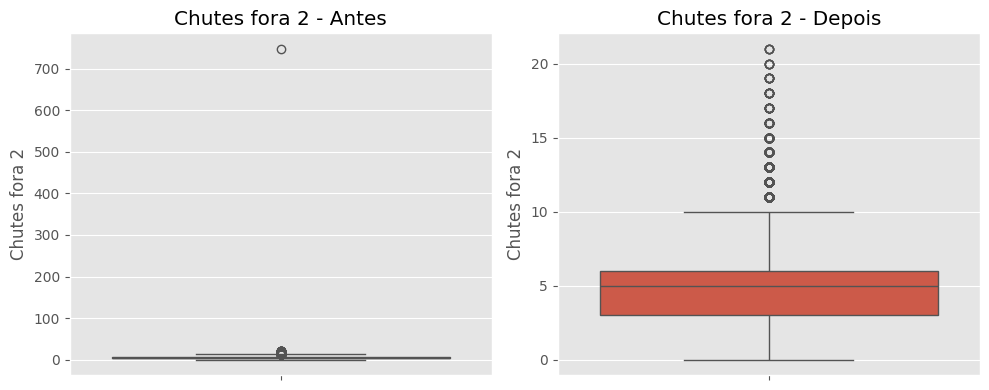

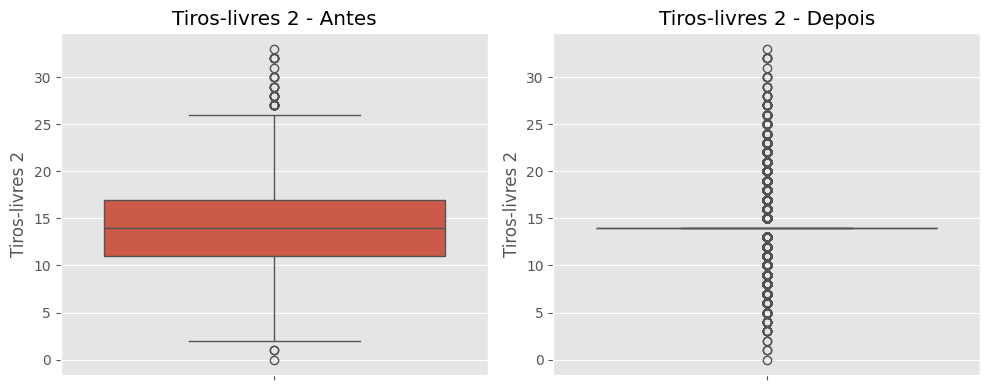

In [149]:
# Lista de colunas que você quer comparar
colunas_para_visualizar = ['Chutes fora 2', 'Tiros-livres 2']

# Cria os subplots
for col in colunas_para_visualizar:
    plt.figure(figsize=(10, 4))

    # Antes
    plt.subplot(1, 2, 1)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Antes')

    # Depois
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df_copy[col])
    plt.title(f'{col} - Depois')

    plt.tight_layout()
    plt.show()


### Mudando o tipo de variável das colunas

Vamos codificar as colunas Position 1, Position 2, Time 1 e Time 2.

In [150]:
# Colunas não numéricas: Time e Position

times = np.union1d(df['Time 1'].dropna().unique(), df_copy['Time 2'].dropna().unique())
times_codigo = {times[i]: (i+1) for i in range(len(times))}
print("Total de Times = {}".format(len(times)))

posicoes = np.union1d(df['Position 1'].dropna().unique(), df_copy['Position 2'].dropna().unique())
posicoes_codigo = {posicoes[i]: (i+1) for i in range(len(posicoes))}
print("Total de Formações = {}".format(len(posicoes)))

def insere_coluna_codificada(coluna, nome_coluna_codigo, dicionario_codificacao):
    if(nome_coluna_codigo not in df_copy.columns):
        df_copy.insert(df_copy.columns.get_loc( coluna )+1, nome_coluna_codigo, df_copy[ coluna ].map( dicionario_codificacao ))

# Cria o dataframe com as colunas não numéricas codificadas em novas

insere_coluna_codificada('Position 1', 'Pos1_codigo', posicoes_codigo)
insere_coluna_codificada('Position 2', 'Pos2_codigo', posicoes_codigo)
insere_coluna_codificada('Time 1', 'Time1_codigo', times_codigo)
insere_coluna_codificada('Time 2', 'Time2_codigo', times_codigo)

df_codificado = df_copy.copy()
df_codificado.head(5)

Total de Times = 310
Total de Formações = 30


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,3.0,0.0,14.0,14.0,2.0,3.0,77.0,23.0,Glasgow Rangers,119,Livingston,171,4-3-3,23,4-3-3,23
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,0.0,0.0,14.0,14.0,2.0,3.0,44.0,56.0,Ross County,236,St.Johnstone,260,3-5-2,12,3-5-2,12
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,2.0,2.0,14.0,14.0,2.0,3.0,47.0,53.0,Dundee FC,86,St. Mirren,259,4-3-3,23,3-4-1-2,8
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,2.0,1.0,14.0,14.0,2.0,3.0,27.0,73.0,Hearts,129,Celtic,69,3-4-3,10,4-2-3-1,20
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,2.0,0.0,14.0,14.0,2.0,3.0,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25,3-5-1-1,11


 ### Análise de Correlações

 Assim sendo, para entendermos melhor a correlação entre Chutes a Gols e Gols, montamos um pairplot para verificarmos como a quantidade de gols varia em função do número de gols e vice-versa, o que nos resultou no resultado a seguir:


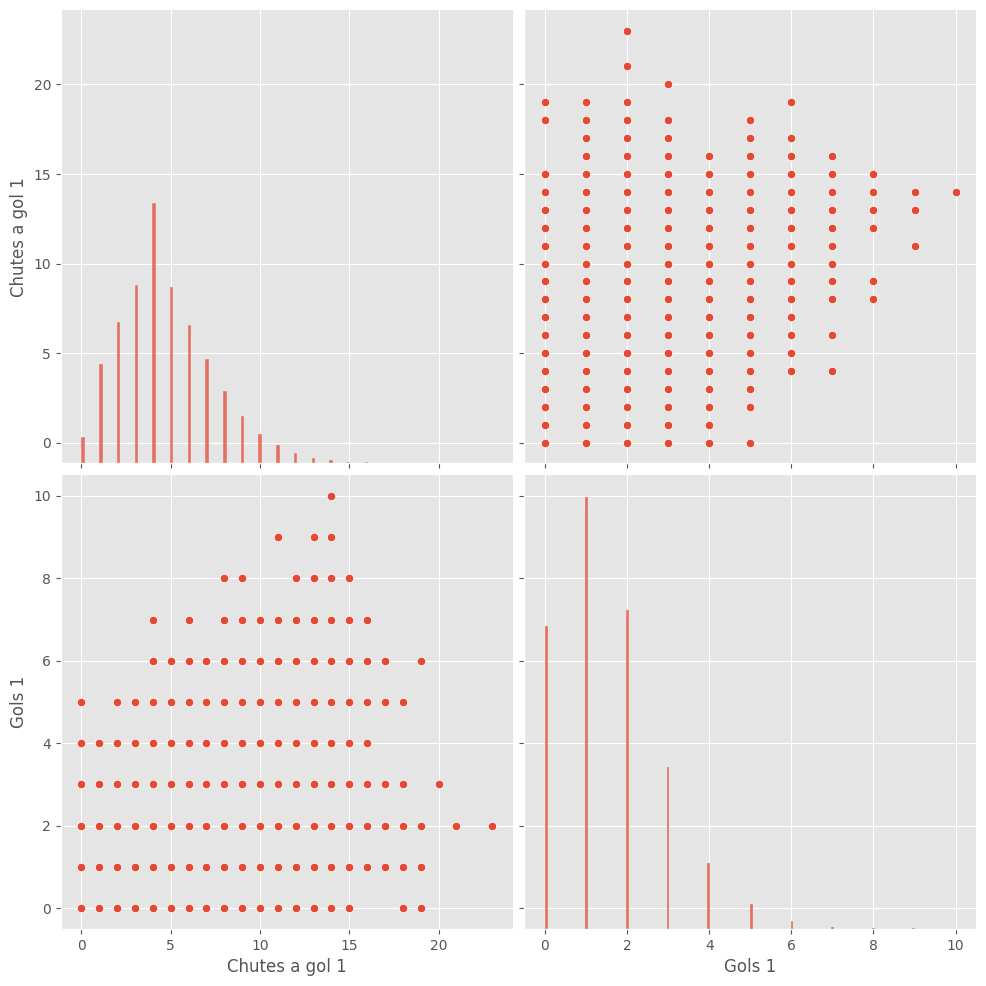

In [151]:

sns.pairplot(df_codificado, vars=['Chutes a gol 1', 'Gols 1'], height=5)
plt.show()

Conforme podemos ver, não está muito claro, nos gráficos, se tais dados possuem uma alta correlação. Os dataTypes das colunas Chute a Gols 1 e Gols 1 são floats, porém, o conjunto que representa a possibilidade de valores dessas colunas pode facilmente ser identificado como um conjunto discreto, já que é impossível termos 3.5956754 gols em um partida, ou 5.67532 chute a gol em outra. Sendo assim, a quantidade de vezes que um par de dados (Chutes a Gol 1, Gols 1) aparece, no nosso dataset, é muito importante para que ocorra a plotação de um possível gráfico, pois podem haver vários casos em que acontecem, por exemplo, 10 chutes a gol e 5 gols em certas partidas. Consequentemente, um gráfico em 2d (Chutes a gol 1, Gols 1) não é suficiente para tirarmos conclusões na nossa análise, temos utilizar que outro eixo (frequência).

O código abaixo reúne, em um novo dataFrame, tais informações que necessitamos atualmente.

In [152]:
result = df_codificado.groupby(['Chutes a gol 1', 'Gols 1']).size().reset_index(name='Frequência').sort_values('Frequência', ascending=False)
print(result)

     Chutes a gol 1  Gols 1  Frequência
24              4.0     1.0        1976
18              3.0     1.0        1490
25              4.0     2.0        1373
23              4.0     0.0        1357
32              5.0     1.0        1269
..              ...     ...         ...
143            18.0     5.0           1
146            19.0     2.0           1
147            19.0     6.0           1
148            20.0     3.0           1
150            23.0     2.0           1

[151 rows x 3 columns]


Dessa forma, montamos um gráfico para visualizarmos tais informações de forma mais intuitiva

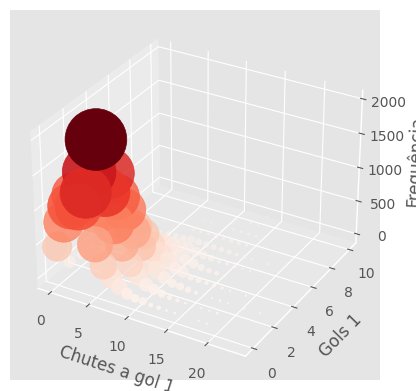

In [153]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = result['Chutes a gol 1']
y = result['Gols 1']
z = result['Frequência']

ax.set_xlabel('Chutes a gol 1')
ax.set_ylabel('Gols 1')
ax.set_zlabel('Frequência')

ax.scatter(x,y, z, s=z, c=z, cmap='Reds')

plt.show()

Nesse gráfico, é importante perceber que, quanto maior a frequência, mais escura é a esfera.

A partir dele, podemos entender que, analisando as esferas mais escuras (casos que ocorrem mais no nosso dataset), um aumento no número de chutes a gol está muito correlacionado com uma maior quantidade de gols.

Podemos perceber, também, que os casos com o maior número de gols (são poucos casos, representados por esferas mais claras) estão muito relacionados com uma alta quantidade de chutes a gol de uma partida. 


#### Análise Geral

Nesse sentido, decidimos realizar uma análise geral de todas as correlações do nosso dataFrame. 

Podemos perceber que, de fato, Chutes a gol tem uma alta correlação com Gols no heatmap produzido pelo código a seguir:

Gols 1                 1.000000
Chutes a gol 1         0.476899
Posse 1(%)             0.128902
Cartões vermelhos 2    0.092427
Contra-ataques 1       0.078828
Defesas difíceis 2     0.049286
Impedimentos 1         0.040647
Pos2_codigo            0.017686
Time2_codigo           0.016841
Escanteios 1           0.012060
Cartões amarelos 2     0.010686
Pos1_codigo            0.007062
Chutes fora 1          0.001420
Chutes bloqueados 1   -0.001140
Time1_codigo          -0.009374
Cruzamentos 2         -0.019071
Impedimentos 2        -0.033163
Escanteios 2          -0.036367
Defesas difíceis 1    -0.039220
Chutes bloqueados 2   -0.041129
Tiros-livres 2        -0.044405
Tiros-livres 1        -0.046207
Chutes fora 2         -0.048837
Laterais 2            -0.054250
Cruzamentos 1         -0.054469
Faltas 2              -0.063158
Gols 2                -0.063928
Cartões vermelhos 1   -0.065833
Faltas 1              -0.071561
Contra-ataques 2      -0.083353
Chutes a gol 2        -0.087207
Laterais

<Axes: >

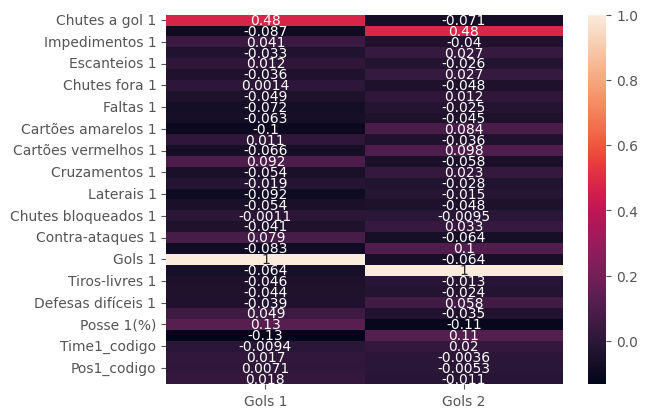

In [154]:
correlacoes = df_codificado.drop(['Time 1', 'Time 2', 'Position 1', 'Position 2'], axis=1).corr()
#sns.heatmap(correlacoes)


correlacoes_com_Gols = pd.DataFrame({
    "Gols 1": correlacoes['Gols 1'], 
    "Gols 2": correlacoes['Gols 2'], 
})


print(correlacoes_com_Gols['Gols 1'].sort_values(ascending=False))
print()
print(correlacoes_com_Gols['Gols 2'].sort_values(ascending=False))

sns.heatmap(correlacoes_com_Gols, annot=True, annot_kws={"size":10})

### Previsão pelo Modelo de Redes Neurais

In [155]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

np.set_printoptions(threshold=np.inf)

#Separa um conjunto de dados para treino e teste
train, test = train_test_split(df_codificado, test_size=0.2, shuffle=False)

#Printa quantidade de linhas dos dados de teste
print(len(test))

erros = []

# Função que calcula a previsão dos gols com base nas colunas utilizadas para o treino
# Possui dois parâmetros. Colunas correlação são as que possuem mais correlação com a coluna Gols. Colunas Gols: coluna Gols a ser analisada, seja Gols 1 ou Gols 2. 
def previsaoResultadoGol(colunasCorrelação, colunasGols):


    # Monta um dataframe de treino com as colunas com mais correlação  com gols 
    colunasGols1Treino = train[colunasCorrelação]

    # Monta um dataframe com a coluna gols 
    gols = train[colunasGols]

    # Realiza o setup do modelo
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=15, random_state=1,max_iter=100)


    # Treina o modelo
    clf.fit(colunasGols1Treino, gols)

    # Monta um dataframe com os dados de teste
    colunasGols1Teste = test[colunasCorrelação]

    # Testa o modelo
    resultadoModelo = clf.predict(colunasGols1Teste)

    # Visualiza array com os gols previstos dos dados de treino
    # print(resultadoModelo)

    #Calcula erro médio absoluto de gols 
    sum = 0
    for i in range(len(test)):
      sum += abs(test[colunasGols].iloc[i] - resultadoModelo[i])

    erroGol = sum/(len(test))
    erros.append(erroGol)


#Prevê Gols do time 1
previsaoResultadoGol(['Chutes a gol 1','Posse 1(%)', 'Posse 2(%)', 'Cartões amarelos 1'],'Gols 1')

#Prevê Gols do time 2
previsaoResultadoGol(['Chutes a gol 2','Posse 2(%)','Contra-ataques 2', 'Posse 1(%)'],'Gols 2')

#Printa os erros de cálculos de previsão de Gols 1 e Gols 2, respectivamente
print(f'Erro médio gols 1: {erros[0]}\nErro médio gols 2: {erros[1]}')





5537


/home/antoniopedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Erro médio gols 1: 0.8602131117933899
Erro médio gols 2: 0.7608813436879176


/home/antoniopedro/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


###  Previsão pelo Modelo de Regressão Linear

Começaremos tentando prever o placar apenas usando as variáveis/colunas com boa correlação com Gols 1/2 e/ou que fazem sentido no contexto do futebol, ou seja, 


Gols 1 ~ Modelo(Chutes a gol 1, Contra-ataques 1, Posse 1(%), Cartões amarelos 2, Posse 2(%), Contra-ataques 2)

Gols 2 ~ Modelo(Chutes a gol 2, Contra-ataques 2, Posse 2(%), Cartões amarelos 1, Posse 1(%), Contra-ataques 1)

sendo outras candidatas (e.g., Defesas Difíceis) adicionadas para avaliar mudanças na qualidade da previsão.

Fontes: 

https://medium.com/@lamartine_sl/regress%C3%A3o-linear-com-sklearn-modelo-de-previs%C3%A3o-de-custos-com-plano-de-sa%C3%BAde-5e963e590f4c


In [156]:
print(df_codificado.columns.sort_values())

df_codificado.head()

Index(['Cartões amarelos 1', 'Cartões amarelos 2', 'Cartões vermelhos 1',
       'Cartões vermelhos 2', 'Chutes a gol 1', 'Chutes a gol 2',
       'Chutes bloqueados 1', 'Chutes bloqueados 2', 'Chutes fora 1',
       'Chutes fora 2', 'Contra-ataques 1', 'Contra-ataques 2',
       'Cruzamentos 1', 'Cruzamentos 2', 'Defesas difíceis 1',
       'Defesas difíceis 2', 'Escanteios 1', 'Escanteios 2', 'Faltas 1',
       'Faltas 2', 'Gols 1', 'Gols 2', 'Impedimentos 1', 'Impedimentos 2',
       'Laterais 1', 'Laterais 2', 'Pos1_codigo', 'Pos2_codigo', 'Position 1',
       'Position 2', 'Posse 1(%)', 'Posse 2(%)', 'Time 1', 'Time 2',
       'Time1_codigo', 'Time2_codigo', 'Tiros-livres 1', 'Tiros-livres 2'],
      dtype='object')


,Chutes a gol 1,Chutes a gol 2,Impedimentos 1,Impedimentos 2,Escanteios 1,Escanteios 2,Chutes fora 1,Chutes fora 2,Faltas 1,Faltas 2,Cartões amarelos 1,Cartões amarelos 2,Cartões vermelhos 1,Cartões vermelhos 2,Cruzamentos 1,Cruzamentos 2,Laterais 1,Laterais 2,Chutes bloqueados 1,Chutes bloqueados 2,Contra-ataques 1,Contra-ataques 2,Gols 1,Gols 2,Tiros-livres 1,Tiros-livres 2,Defesas difíceis 1,Defesas difíceis 2,Posse 1(%),Posse 2(%),Time 1,Time1_codigo,Time 2,Time2_codigo,Position 1,Pos1_codigo,Position 2,Pos2_codigo
0,8.0,0.0,6.0,3.0,7.0,1.0,6.0,1.0,8.0,14.0,0.0,5.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,3.0,0.0,14.0,14.0,2.0,3.0,77.0,23.0,Glasgow Rangers,119,Livingston,171,4-3-3,23,4-3-3,23
1,0.0,2.0,0.0,2.0,0.0,4.0,3.0,4.0,19.0,14.0,4.0,1.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,0.0,0.0,14.0,14.0,2.0,3.0,44.0,56.0,Ross County,236,St.Johnstone,260,3-5-2,12,3-5-2,12
2,4.0,5.0,1.0,5.0,8.0,11.0,2.0,5.0,13.0,14.0,2.0,2.0,1.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,2.0,2.0,14.0,14.0,2.0,3.0,47.0,53.0,Dundee FC,86,St. Mirren,259,4-3-3,23,3-4-1-2,8
3,4.0,7.0,8.0,1.0,6.0,5.0,4.0,7.0,4.0,11.0,0.0,0.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,2.0,1.0,14.0,14.0,2.0,3.0,27.0,73.0,Hearts,129,Celtic,69,3-4-3,10,4-2-3-1,20
4,3.0,1.0,1.0,3.0,5.0,4.0,2.0,2.0,12.0,17.0,1.0,3.0,0.0,0.0,17.0,13.0,16.0,15.0,2.0,2.0,1.0,1.0,2.0,0.0,14.0,14.0,2.0,3.0,58.0,42.0,Aberdeen,4,Dundee U.,87,4-4-2,25,3-5-1-1,11


In [157]:
# Separa o dataframe para o modelo (df_final) e separam-se as colunas que serão utilizadas para as previsões

df_final = df_codificado.copy()

colunas_previsao_Gols_1 = ['Time1_codigo', 'Time2_codigo', 'Pos1_codigo', 'Pos2_codigo', 'Chutes a gol 1', 'Contra-ataques 1', 
                           'Posse 1(%)', 'Cartões amarelos 2','Posse 2(%)', 'Contra-ataques 2']

colunas_previsao_Gols_2 = ['Time1_codigo', 'Time2_codigo', 'Pos1_codigo', 'Pos2_codigo', 'Chutes a gol 2', 'Contra-ataques 2', 
                           'Posse 2(%)', 'Cartões amarelos 1', 'Posse 1(%)', 'Contra-ataques 1']

# Colunas candidatas: 'Cartões vermelhos 1', 'Cartões vermelhos 2',
#                     'Defesas difíceis 1', 'Defesas difíceis 2'

df_final[colunas_previsao_Gols_2]

,Time1_codigo,Time2_codigo,Pos1_codigo,Pos2_codigo,Chutes a gol 2,Contra-ataques 2,Posse 2(%),Cartões amarelos 1,Posse 1(%),Contra-ataques 1
0,119,171,23,23,0.0,1.0,23.0,0.0,77.0,1.0
1,236,260,12,12,2.0,1.0,56.0,4.0,44.0,1.0
2,86,259,23,8,5.0,1.0,53.0,2.0,47.0,1.0
3,129,69,10,20,7.0,1.0,73.0,0.0,27.0,1.0
4,4,87,25,11,1.0,1.0,42.0,1.0,58.0,1.0
...,...,...,...,...,...,...,...,...,...,...
27699,23,42,25,26,2.0,3.0,48.0,2.0,52.0,1.0
27700,21,108,20,25,0.0,1.0,48.0,2.0,52.0,1.0
27701,180,263,25,25,7.0,1.0,45.0,2.0,55.0,1.0
27702,299,179,26,25,6.0,1.0,55.0,2.0,45.0,1.0


In [158]:
### Modelo de Regressão Linear para prever Gols 1

X = df_final[colunas_previsao_Gols_1]
y = df_final['Gols 1']

# Separando X e y para treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando um Objeto de Regressão Linear
lr_Gols_1 = LinearRegression()

# Treinando o Modelo
lr_Gols_1.fit(x_train, y_train)

# Verificando o resultado
print("# Gols 1")
r_sq = lr_Gols_1.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

# Análise dos Erros
# o erro absoluto médio se mostra mais adequado para ver a distância da
# quantidade de gols prevista para a real
y_pred = lr_Gols_1.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Gols 1
Coeficiente de Determinação (R²): 0.23736149701054943
MAE: 0.8850508997094376
MSE: 1.2465383616273833


In [159]:
### Modelo de Regressão Linear para prever Gols 2

X = df_final[colunas_previsao_Gols_2]
y = df_final['Gols 2']

# Separando X e y para treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando um Objeto de Regressão Linear
lr_Gols_2 = LinearRegression()

# Treinando o Modelo
lr_Gols_2.fit(x_train, y_train)

# Verificando o resultado
print("# Gols 2")
r_sq = lr_Gols_2.score(X, y)
print('Coeficiente de Determinação (R²):', r_sq)

# Análise dos Erros
# o erro absoluto médio se mostra mais adequado para ver a distância da
# quantidade de gols prevista para a real
y_pred = lr_Gols_2.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Gols 2
Coeficiente de Determinação (R²): 0.24753906134259518
MAE: 0.7715205422759857
MSE: 0.9633236736734575


In [160]:
### Prevendo o resultado de uma partida passada como entrada para o modelo treinado
import random

partida = df_final.iloc[[ random.randint(0, df_final.shape[0]) ]]

placar_real = partida['Gols 1'].values, partida['Gols 2'].values
placar_previsto = lr_Gols_1.predict(partida[colunas_previsao_Gols_1]), lr_Gols_2.predict(partida[colunas_previsao_Gols_2])

print(f'Placar previsto (1x2): {placar_previsto[0]} a {placar_previsto[1]}; Diferença: {placar_previsto[0]-placar_previsto[1]}')

print(f'Placar real (1x2): {placar_real[0]} a {placar_real[1]}; Diferença: {placar_real[0]-placar_real[1]}')

Placar previsto (1x2): [1.23120677] a [2.01259872]; Diferença: [-0.78139195]
Placar real (1x2): [1.] a [2.]; Diferença: [-1.]


### Modelo Regressão Logística


Inicialmente é necessario criar uma coluna target de resultados para que o modelo consiga comparar o que ele previu com o que realmente aconteceu. Essa nova coluna tem valores:
- 1: time 1 venceu;
- 2: time 2 venceu; 

In [161]:
# 1 = time 1 venceu, 0 = empate, -1 = time 2 venceu
def classifica_resultado(g1, g2):
    if g1 > g2:
        return 1
    elif g2 > g1:
        return 2

df_codificado['resultado'] = df_codificado.apply(lambda row: classifica_resultado(row['Gols 1'], row['Gols 2']), axis=1)

In [162]:
# Exibindo as primeiras linhas da tabela com a nova coluna
print(df_codificado[['Gols 1', 'Gols 2', 'resultado']])

       Gols 1  Gols 2  resultado
0         3.0     0.0        1.0
1         0.0     0.0        NaN
2         2.0     2.0        NaN
3         2.0     1.0        1.0
4         2.0     0.0        1.0
...       ...     ...        ...
27699     0.0     1.0        2.0
27700     4.0     0.0        1.0
27701     4.0     0.0        1.0
27702     1.0     1.0        NaN
27703     0.0     0.0        NaN

[27681 rows x 3 columns]


In [163]:
df_codificado['Laterais 2'] = df_codificado['Laterais 2'].fillna(
df_codificado['Laterais 2'].median())

In [164]:
# Lista de variáveis para o modelo
features = [
    'Chutes a gol 1', 'Chutes a gol 2',
    'Contra-ataques 1', 'Contra-ataques 2',
    'Cartões vermelhos 2', 'Cartões amarelos 1',
    'Cartões vermelhos 1', 'Laterais 2'
]

df_codificado['resultado'] = df_codificado.apply(lambda row: classifica_resultado(row['Gols 1'], row['Gols 2']), axis=1)

# Remover linhas com NaN nas colunas usadas
df_treino = df_codificado.dropna(subset=features + ['resultado'])

# Separar X e y
X = df_treino[features]
y = df_treino['resultado']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.17, random_state=42)

# Treina o modelo
modelo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

# Fazer previsões e avaliar
y_pred = modelo.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Acurácia: 0.7589743589743589

Relatório de Classificação:
              precision    recall  f1-score   support

         1.0       0.76      0.87      0.81      2117
         2.0       0.75      0.59      0.66      1393

    accuracy                           0.76      3510
   macro avg       0.76      0.73      0.74      3510
weighted avg       0.76      0.76      0.75      3510



/home/antoniopedro/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


### Modelo de Random Forest


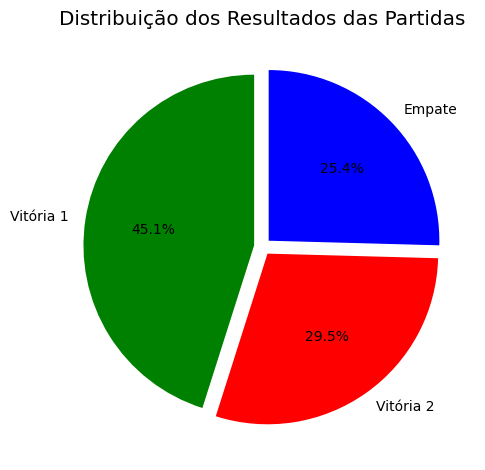

In [165]:
# Função para classificar o resultado da partida


def classificar_resultado(row):
    if row['Gols 1'] > row['Gols 2']:
        return 'Vitória 1'
    elif row['Gols 2'] > row['Gols 1']:
        return 'Vitória 2'
    else:
        return 'Empate'


# Aplica a classificação
df_randomForest['Resultado'] = df_randomForest.apply(classificar_resultado, axis=1)

# Conta e normaliza os resultados
distribuicao_resultados = df_randomForest['Resultado'].value_counts(normalize=True)

# Define as cores na ordem dos índices
cores = {
    'Vitória 1': 'green',
    'Vitória 2': 'red',
    'Empate': 'blue'
}

# Gráfico de pizza
distribuicao_resultados.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    explode=[0.05] * len(distribuicao_resultados),
    colors=[cores[resultado] for resultado in distribuicao_resultados.index]
)

plt.title('Distribuição dos Resultados das Partidas')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.tight_layout()
plt.show()

Previsao pelo Modelo de Random Florest

Foi utilizado o modelo de Random Forest baseado em diferenças estatísticas entre dois times (as chamadas features diferenciais) para prever o resultado de partidas de futebol, incluindo vitórias e empates.Foi escolhidas as features que tiveravem a maior porcentagem de correlação com o resultado.

O modelo não utiliza diretamente os valores absolutos das estatísticas dos times, como “Chutes a gol 1”. Em vez disso, calcula-se a diferença entre os dois lados, como “Chutes a gol 1 - Chutes a gol 2”.Já que é uma abordagem que reduz a necessidade de normalização ou padronização e melhora a capacidade de generalização para jogos entre equipes diferentes.

Os outliers, que em outros modelos como regressões podem causar distorções significativas, têm pouco efeito no Random Forest. Isso ocorre porque árvores de decisão segmentam os dados e isolam casos extremos em galhos próprios e o impacto de um outlier em uma única árvore é diluído quando centenas de árvores são combinadas. No futebol, valores que podem parecer extremos, mas muitas vezes são momentos decisivos da partida. Remover esses dados seria não usar informações cruciais.

Da mesma forma é comum acreditar que valores nulos precisam sempre ser tratados. No entanto, ao fazer isso, corre-se o risco de inserir padrões artificiais nos dados. O Random Forest é tolerante a dados faltantes quando eles não são predominantes. Ao manter os nulos, o modelo consegue aprender padrões mais reais e específicos do domínio.


Empates são naturalmente mais difíceis de prever, pois são menos frequentes e apresentam padrões estatísticos menos claros. Ao aplicar pesos maiores para essa classe usando class_weight, o modelo consegue aprender mais sobre esse tipo de resultado e corrigir o desequilíbrio entre as classes.


Assim este modelo tenta respeita a natureza dos dados esportivos: imprevisíveis, desbalanceados e repletos de exceções. Ao não tratar valores nulos ou outliers e ao usar variáveis diferenciais entre os times, o Random Forest aproveita melhor as informações disponíveis e foca no que realmente importa: padrões consistentes e reais de desempenho.

Embora pareça contraintuitiva, essa abordagem entrega melhor desempenho preditivo justamente porque não tenta fazer uma “limpeza” que pode apagar informações imporatantes. O modelo aprende com os dados como eles são no futebol.

No gráfico de performace o modelo apresentou desempenho sólido nas classes mais representadas, especialmente na categoria Vitória 1.Em relação à precisão (precision), Vitória 1 obteve o melhor resultado com 0.69, seguida por Vitória 2 com 0.63. A classe Empate teve a menor precisão, com 0.46, indicando que muitas previsões de empate estavam incorretas.

No aspecto de revocação (recall), o modelo também teve melhor desempenho em Vitória 1, com 0.77, demonstrando boa capacidade de identificar corretamente os casos dessa classe. Vitória 2 teve um recall de 0.63, enquanto Empate novamente ficou abaixo, com 0.37, revelando que o modelo deixa passar muitos empates reais.

Ao observar o f1-score, que equilibra precisão e recall, Vitória 1 manteve o destaque com 0.73, seguida por Vitória 2 (0.63) e Empate (0.41), mostrando a maior dificuldade do modelo justamente na classe mais equilibrada.

Assim da para perceber que mesmo com a tentativa de balanceamento o modelo ainda favorece vitoria 1 e tem dificuldade de prever empates.

https://awari.com.br/machine-learning-random-forest-modelos-de-random-forest-em-aprendizado-de-maquina-2/
https://mariofilho.com/precisao-recall-e-f1-score-em-machine-learning/


Acurácia: 0.6312939902544668
              precision    recall  f1-score   support

      Empate       0.47      0.34      0.39      1330
   Vitoria 1       0.68      0.78      0.73      2568
   Vitoria 2       0.63      0.63      0.63      1643

    accuracy                           0.63      5541
   macro avg       0.59      0.58      0.59      5541
weighted avg       0.62      0.63      0.62      5541



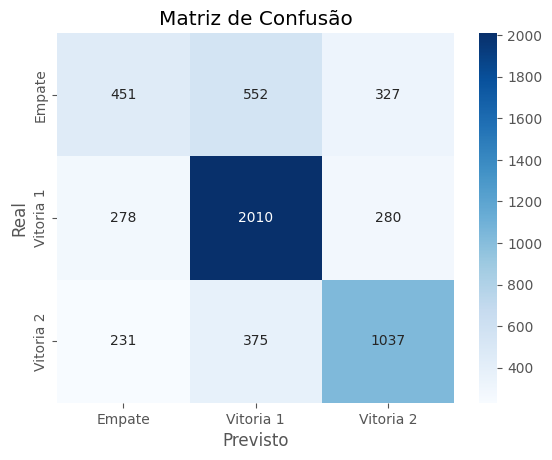

In [166]:




# Cria a coluna 'Resultado'
df_randomForest['Resultado'] = df_randomForest.apply(lambda row: 'Vitoria 1' if row['Gols 1'] > row['Gols 2'] 
                                         else 'Vitoria 2' if row['Gols 2'] > row['Gols 1'] 
                                         else 'Empate', axis=1)

# Remove colunas irrelevantes
colunas_para_remover = [
    "Time 1", "Time 2", 
    "Position 1", "Position 2",
    "Gols 1", "Gols 2",
    'Tratamentos 2', 'Tratamentos 1',
    'Substituições 2', 'Substituições 1',
    'Tiros-livres 2', 'Tiros-livres 1',
    'Tiro de meta 1', 'Tiro de meta 2', 
    'Laterais 1', 'Laterais 2', 
    'Impedimentos 1', 'Impedimentos 2', 
    'Faltas 1', 'Faltas 2',
    'Escanteios 1', 'Escanteios 2', 
    'Chutes fora 2', 'Chutes fora 1', 
    "Cartões vermelhos 1", "Cartões vermelhos 2"
]
df_randomForest = df_randomForest.drop(columns=[col for col in colunas_para_remover if col in df_randomForest.columns])

# Cria variáveis diferenciais _diff
for col1 in [col for col in df_randomForest.columns if col.endswith(" 1")]:
    base = col1[:-2]
    col2 = base + " 2"
    if col2 in df_randomForest.columns:
        df_randomForest[base + "_diff"] = df_randomForest[col1] - df_randomForest[col2]

# Define features e target
features = [col for col in df_randomForest.columns if col.endswith("_diff")]
X = df_randomForest[features]
y = df_randomForest["Resultado"]

# Treina o modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pesos_personalizados = {
    'Vitoria 1': 1.0,
    'Vitoria 2': 1.0,
    'Empate': 1.2
}

modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()
